# FCIQMC (Full Configuration Interaction Quantum Monte Carlo)

論文 [Fermion Monte Carlo without fixed nodes: A game of life, death, and
annihilation in Slater determinant space](https://2024.sci-hub.st/1534/f26924b07d1005f6f9a7be1b525feec7/booth2009.pdf) を読み、Pythonでの実装を試みる。

## 準備

```
$ conda install tqdm
$ conda install -c conda-forge pyscf
```

## ${H_2}$ 分子 STO-3G

FCIによる基底エネルギーは -1.1373 で、FCIQMCによる推定基底エネルギーは -1.137252 なので、うまく計算出来ているように思える。

--- FCI Matrix ---
[[-1.83186365e+00 -5.22608557e-16 -4.67083728e-16  1.81210462e-01]
 [-5.22608557e-16 -1.06466723e+00  1.81210462e-01 -1.64624263e-17]
 [-4.67083728e-16  1.81210462e-01 -1.06466723e+00  8.67705089e-17]
 [ 1.81210462e-01 -1.64624263e-17  8.67705089e-17 -2.52486193e-01]]

---- Initial walkers ----
1 walkers on 0th determinant


 12%|██████████▉                                                                               | 1816/15000 [00:00<00:00, 18150.19it/s]

Step 0: Walkers=1, Shift=0.00000, E_proj=-1.116759
  1 walkers on 0th determinant
Step 1000: Walkers=10, Shift=0.00000, E_proj=-1.116759
  10 walkers on 0th determinant
Step 2000: Walkers=107, Shift=0.00000, E_proj=-1.123797
  103 walkers on 0th determinant
  -4 walkers on 3th determinant


 24%|██████████████████████                                                                     | 3632/15000 [00:00<00:02, 4403.19it/s]

Step 3000: Walkers=451, Shift=-0.79849, E_proj=-1.139864
  400 walkers on 0th determinant
  -51 walkers on 3th determinant


 30%|███████████████████████████▌                                                               | 4549/15000 [00:01<00:04, 2237.01it/s]

Step 4000: Walkers=992, Shift=-1.17683, E_proj=-1.137527
  890 walkers on 0th determinant
  -102 walkers on 3th determinant


 36%|█████████████████████████████████                                                          | 5454/15000 [00:02<00:07, 1267.41it/s]

Step 5000: Walkers=1641, Shift=-1.46326, E_proj=-1.135526
  1487 walkers on 0th determinant
  -154 walkers on 3th determinant


 41%|█████████████████████████████████████▋                                                      | 6149/15000 [00:04<00:11, 793.49it/s]

Step 6000: Walkers=2204, Shift=-1.61909, E_proj=-1.136853
  1984 walkers on 0th determinant
  -220 walkers on 3th determinant


 47%|███████████████████████████████████████████▋                                                | 7123/15000 [00:06<00:18, 425.12it/s]

Step 7000: Walkers=2604, Shift=-1.71467, E_proj=-1.136945
  2343 walkers on 0th determinant
  -261 walkers on 3th determinant


 54%|█████████████████████████████████████████████████▋                                          | 8108/15000 [00:08<00:17, 386.80it/s]

Step 8000: Walkers=2831, Shift=-1.75506, E_proj=-1.135942
  2560 walkers on 0th determinant
  -271 walkers on 3th determinant


 61%|███████████████████████████████████████████████████████▊                                    | 9098/15000 [00:11<00:16, 367.21it/s]

Step 9000: Walkers=3005, Shift=-1.78793, E_proj=-1.136782
  2706 walkers on 0th determinant
  -299 walkers on 3th determinant


 67%|█████████████████████████████████████████████████████████████▏                             | 10083/15000 [00:14<00:13, 354.13it/s]

Step 10000: Walkers=3152, Shift=-1.79758, E_proj=-1.138525
  2814 walkers on 0th determinant
  -338 walkers on 3th determinant


 74%|███████████████████████████████████████████████████████████████████▏                       | 11072/15000 [00:17<00:11, 337.61it/s]

Step 11000: Walkers=3217, Shift=-1.81173, E_proj=-1.137473
  2887 walkers on 0th determinant
  -330 walkers on 3th determinant


 80%|█████████████████████████████████████████████████████████████████████████▏                 | 12072/15000 [00:20<00:08, 337.94it/s]

Step 12000: Walkers=3280, Shift=-1.82544, E_proj=-1.138060
  2935 walkers on 0th determinant
  -345 walkers on 3th determinant


 87%|███████████████████████████████████████████████████████████████████████████████▍           | 13087/15000 [00:23<00:05, 330.27it/s]

Step 13000: Walkers=3326, Shift=-1.81931, E_proj=-1.138480
  2970 walkers on 0th determinant
  -356 walkers on 3th determinant


 94%|█████████████████████████████████████████████████████████████████████████████████████▎     | 14072/15000 [00:26<00:02, 331.60it/s]

Step 14000: Walkers=3362, Shift=-1.83133, E_proj=-1.138287
  3005 walkers on 0th determinant
  -357 walkers on 3th determinant


100%|███████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [00:29<00:00, 516.61it/s]



---- Walkers (result) ----
2989 walkers on 0th determinant
-340 walkers on 3th determinant


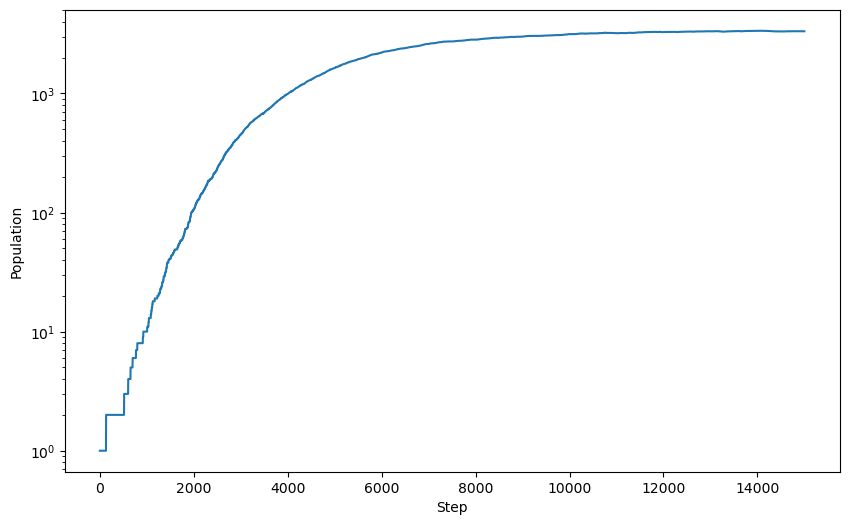

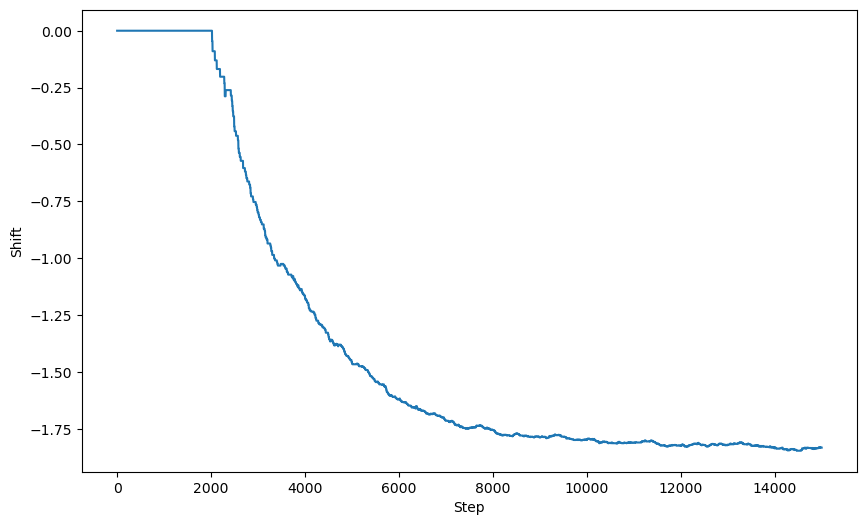

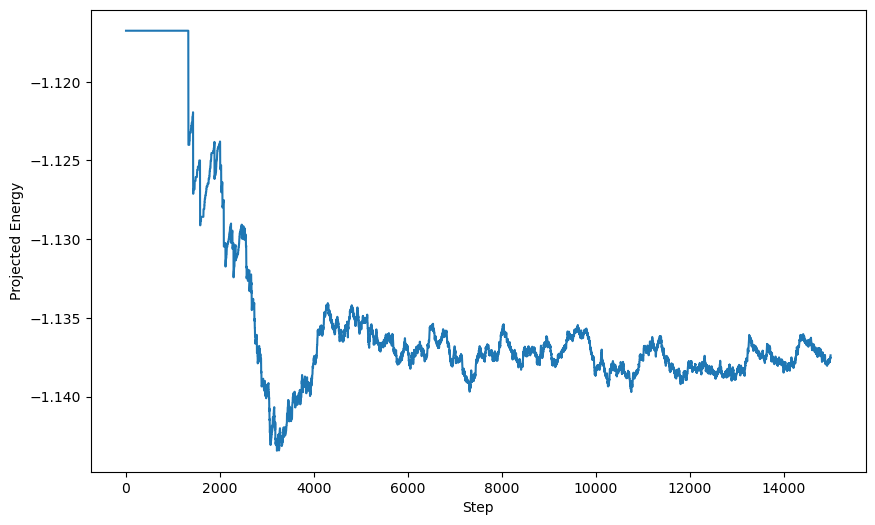

------------------------------
Final FCIQMC Energy: -1.137252 Ha


In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
from pyscf import gto, scf, fci, ao2mo
import random

rng = np.random.default_rng()

def build_hamiltonian(mol):
    """PySCFを使ってFCIハミルトニアン行列全体を生成する"""
    # 1. RHF計算
    mf = scf.RHF(mol).run(verbose=0)
    h1 = mf.get_hcore()
    h2 = mf._eri
    
    # 2. 分子軌道(MO)積分へ変換
    norb = mf.mo_coeff.shape[1]
    nelec = mol.nelectron
    h1_mo = np.dot(mf.mo_coeff.T, np.dot(h1, mf.mo_coeff))
    h2_mo = ao2mo.kernel(mol, mf.mo_coeff)
    
    # 3. 全CIハミルトニアン行列の生成
    # 注意: H2/STO-3Gのような小規模系でのみ可能です。
    # 大規模系ではオンザフライで行列要素を計算する必要があります。
    cisolver = fci.direct_spin1.FCI(mol)
    h2_mo_restore = ao2mo.restore(1, h2_mo, norb)
    H_mat = fci.direct_spin1.pspace(h1_mo, h2_mo_restore, norb, nelec)[1]
    # TODO: E_HFを引いた形のKを使わない？    
    # return H_mat, mf.e_tot, norb, nelec
    return H_mat


def FCIQMC(shift=0, init_n_walker=1, n_steps=15000, step_starting_shift_upd=2000, shift_upd_interval=10,
           dt=0.001, damping=0.05):
    """
    Full Configuration Interaction Quantum Monte Carlo (FCIQMC) を用いて
    H2 分子（R = 0.74 Å）の基底状態エネルギーを推定する。

    Args:
        shift: 初期シフト値 S(0)。ウォーカー数の増減を抑制するためのエネルギー的バイアス
        init_n_walker: 初期状態（参照決定基）に配置するウォーカー数
        n_steps: シミュレーションの総ステップ数
        step_starting_shift_upd: Shift の更新を開始するステップ。初期緩和期間としてこのステップまでは shift を固定する。
        shift_upd_interval: Shift をどの頻度で更新するか（ステップ単位）。例えば 10 なら、10 ステップごとに shift を更新する。
        dt: imaginary time step（時間刻み）。小さいほど安定するが計算コストが増える
        damping: Shift更新時の更新の程度表すパラメータ

    Returns:
        tuple:
            - **E_est (float)**: 最終 1000 ステップの projected energy の平均（推定エネルギー）
            - **hist_population (list[int])**: 各ステップのウォーカー総数の履歴
            - **hist_shift (list[float])**: 各ステップの shift の履歴
            - **hist_energy (list[float])**: 各ステップの projected energy の履歴
    """
    
    # H2分子の定義 (0.74 Angstrom)
    mol = gto.M(atom='H 0 0 0; H 0 0 0.74', basis='sto-3g', verbose=0)
    H_mat = build_hamiltonian(mol)
    print(f"--- FCI Matrix ---")
    print(H_mat)
    
    E_est = 0
    hist_population, hist_shift, hist_energy = [], [], []
    
    diag_H = np.diag(H_mat)    
    pre_shift = shift
    pre_pop = init_n_walker

    # 基底状態（Hartree-Fock解）のインデックスを特定
    # PySCFのFCIでは通常、最初の行列要素がHF状態に対応します
    ref_det_idx = 0 
        
    # ウォーカーの初期化 {det_index: signed_population}
    # 符号付き整数で管理（+1, -1など）
    walkers = {ref_det_idx: init_n_walker}

    print('\n---- Initial walkers ----')
    for k, v in walkers.items():
        tqdm.write(f"{v} walkers on {k}th determinant")

    
    for step in tqdm(range(n_steps)):
        new_walkers = {}
        
        # walkersが乗っている行列式の全てのインデックスを取得
        current_dets = list(walkers.keys())
        # if step % 1000 == 0:
        #     tqdm.write(f"current_dets: {current_dets}")

        
        for i in current_dets:
            n_i = walkers[i] # ith行列式上のウォーカー数（符号付き）
            if n_i == 0: continue

            # ----- Spawning Step -----
            # 通常は接続された決定基をランダムサンプリングするが、
            # ここでは行列が小さいため、接続している全 j を走査（簡単のため）
            row = H_mat[i]
            # 非ゼロ要素のインデックスを取得
            connected_dets = np.where(row != 0)[0]
            
            for j in connected_dets:
                # 対角要素は自分自身への遷移を表すので処理しない
                if i == j: continue
                h_ij = row[j]

                # Spawning probability: Ps = dt * |H_ij|
                # 生成される数: sign(walker) * sign(-H_ij)
                # TODO: 分母のpgenは1？
                prob_spawn = dt * abs(h_ij)

                # 全てのwalkerに対して、spawnを試みる
                for k in range(n_i):            
                    if rng.random() <= prob_spawn:
                        # print(f'prob_spawn from {i} to {j}th determinant: ', prob_spawn)
                        if j not in new_walkers: new_walkers[j] = 0

                        n_spawn = 1
                        if prob_spawn >= 1:
                            prob_spawn_frac, prob_spawn_int = math.modf(prob_spawn)
                            n_spawn = prob_spawn_int + int(rng.random() < prob_spawn_frac) # 小数部分の確率でもう一つwalkerを追加で生成する

                        # h_ij>0ならば親と異符号、h_ij<0ならば親と同符号のwalkerを遷移先jth行列式の上に生成
                        if h_ij > 0:
                            new_walkers[j] += -np.sign(n_i) * n_spawn
                        else:
                            new_walkers[j] += np.sign(n_i) * n_spawn

            # ----- Diagonal Step (Death/Cloning) -----
            # Pd = exp(-dt * (H_ii - S)) - 1  ~ -dt * (H_ii - S)
            h_ii = diag_H[i]
            prob_death = dt * (h_ii - shift)
            n_walker_on_D = n_i
            sign = np.sign(n_walker_on_D)

            for k in range(abs(n_i)):
                if rng.random() <= abs(prob_death):
                    if prob_death > 0:
                        # prob_deathが正ならwalkerを一つ消滅させる
                        n_walker_on_D = sign * (abs(n_walker_on_D) - 1)
                    else:
                        # prob_deathが負ならwalkerを一つ複製する
                        n_walker_on_D = sign * (abs(n_walker_on_D) + 1)
            walkers[i] = n_walker_on_D

        # ----- Annihilation Step -----
        for idx, n in new_walkers.items():
            walkers[idx] = walkers.get(idx, 0) + n

        # ---- Shift Update -----
        current_pop = sum(abs(w) for w in walkers.values())
        if step > step_starting_shift_upd: # 初期緩和後
            if step % shift_upd_interval == 0:
                shift = pre_shift - (damping / (shift_upd_interval*dt)) * np.log(current_pop / pre_pop)
                pre_shift = shift
        hist_shift.append(shift)
        pre_pop = current_pop
        hist_population.append(current_pop)
        
        # ----- Energy Estimation (Projected Energy) -----
        E_HF = diag_H[ref_det_idx]
        row0 = H_mat[ref_det_idx]
        num_ref = walkers.get(ref_det_idx, 0)
        E_proj = E_HF + sum(row0[idx]*v/num_ref for idx, v in walkers.items() if idx != ref_det_idx)
        # TODO: 論文にはない項を足している
        E_proj += mol.energy_nuc()
        hist_energy.append(E_proj)
        # TODO: singles/doublesに限定する？
        
        if step % 1000 == 0:
            tqdm.write(f"Step {step}: Walkers={current_pop}, Shift={shift:.5f}, E_proj={E_proj:.6f}")
            for k, v in walkers.items():
                tqdm.write(f"  {v} walkers on {k}th determinant")

    E_est = np.mean(hist_energy[-1000:]) # 最後の1000ステップの平均
    
    print('\n---- Walkers (result) ----')
    for k, v in walkers.items():
        print(f"{v} walkers on {k}th determinant")

    return E_est, hist_population, hist_shift, hist_energy



# --- 実行 ---
E_est, hist_population, hist_shift, hist_energy = FCIQMC()

plt.figure(figsize=(10, 6))
plt.plot(hist_population)
plt.xlabel('Step')
plt.ylabel('Population')
plt.yscale('log')

plt.figure(figsize=(10, 6))
plt.plot(hist_shift)
plt.xlabel('Step')
plt.ylabel('Shift')

plt.figure(figsize=(10, 6))
plt.plot(hist_energy)
plt.xlabel('Step')
plt.ylabel('Projected Energy')

plt.show()

# 正解値（厳密な対角化）との比較
print("-" * 30)
print(f"Final FCIQMC Energy: {E_est:.6f} Ha")

# # PySCFの厳密解(FCI)
# # cisolver = fci.FCI(mol, scf.RHF(mol).run(verbose=0))
# # print(f"Exact FCI Energy   : {cisolver.kernel()[0]:.6f} Ha")